In [1]:
import cv2
import os
from ultralytics import YOLO
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"Tesseract-OCR\tesseract.exe"

In [2]:
yolo_model = YOLO(r"models/helmet_numplate_2.pt")

In [7]:
yolo_model1 = YOLO(r"models/helmetnumberplate.pt")

In [66]:
image = cv2.imread(r'testimages/new142.png')

In [67]:
import matplotlib.pyplot as plt

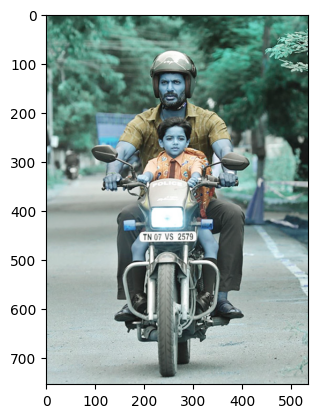

In [68]:
plt.imshow(image)

In [69]:
detections = yolo_model(image)[0]


0: 640x480 1 Helmet, 1 NumPlate, 101.0ms
Speed: 3.0ms preprocess, 101.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


In [70]:
for x in detections.boxes:
    x1, y1, x2, y2 = map(int, x.xyxy[0])  # Extract bounding box
    cls = int(x.cls[0])  # Get class ID
    print(cls,x1,y1,x2,y2)
    if cls == 0:  # Helmet class
        helmet_present = "Yes"
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, "Helmet", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    elif cls == 1:
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, "Num", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        plate_roi = image[y1:y2, x1:x2]
        if plate_roi.size == 0:
            print("rio is empty")
        else:
            gray_plate = cv2.cvtColor(plate_roi, cv2.COLOR_BGR2GRAY)
            result = pytesseract.image_to_string(gray_plate)
            

0 203 67 318 188
1 184 442 308 473


In [71]:
result

''

In [72]:
import matplotlib.pyplot as plt

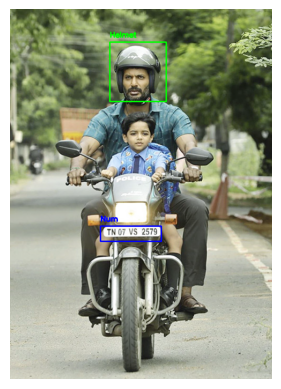

In [73]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis("off")  # Hide axis
plt.show()

In [74]:
import easyocr
ocr_reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [77]:
result = ocr_reader.readtext(gray_plate)[0]

In [78]:
result

([[10, 0], [120, 0], [120, 24], [10, 24]], 'TnOZ VS 2579', 0.30386359824440107)